In [10]:
# dict_ = {"n_neighbors": np.arange(1,200),
#         "weights" : ['uniform', 'distance'],
#         "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#         "leaf_size" : np.arange(1,10)}

In [11]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [12]:
import pandas as pd
import os
import numpy as np
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [13]:
%config Completer.use_jedi = False

In [14]:
'assists', 'baronKills', 'bountyLevel', 'challenges', 'champExperience', 'champLevel', 'championId', 'championName', 'championTransform', 'consumablesPurchased', 'damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 'damageSelfMitigated', 'deaths', 'detectorWardsPlaced', 'doubleKills', 'dragonKills', 'firstBloodAssist', 'firstBloodKill', 'firstTowerAssist', 'firstTowerKill', 'gameEndedInEarlySurrender', 'gameEndedInSurrender', 'goldEarned', 'goldSpent', 'individualPosition', 'inhibitorKills', 'inhibitorTakedowns', 'inhibitorsLost', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'itemsPurchased', 'killingSprees', 'kills', 'lane', 'largestCriticalStrike', 'largestKillingSpree', 'largestMultiKill', 'longestTimeSpentLiving', 'magicDamageDealt', 'magicDamageDealtToChampions', 'magicDamageTaken', 'neutralMinionsKilled', 'nexusKills', 'nexusLost', 'nexusTakedowns', 'objectivesStolen', 'objectivesStolenAssists', 'participantId', 'pentaKills', 'perks', 'physicalDamageDealt', 'physicalDamageDealtToChampions', 'physicalDamageTaken', 'profileIcon', 'puuid', 'quadraKills', 'riotIdName', 'riotIdTagline', 'role', 'sightWardsBoughtInGame', 'spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts', 'summoner1Casts', 'summoner1Id', 'summoner2Casts', 'summoner2Id', 'summonerId', 'summonerLevel', 'summonerName', 'teamEarlySurrendered', 'teamId', 'teamPosition', 'timeCCingOthers', 'timePlayed', 'totalDamageDealt', 'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates', 'totalDamageTaken', 'totalHeal', 'totalHealsOnTeammates', 'totalMinionsKilled', 'totalTimeCCDealt', 'totalTimeSpentDead', 'totalUnitsHealed', 'tripleKills', 'trueDamageDealt', 'trueDamageDealtToChampions', 'trueDamageTaken', 'turretKills', 'turretTakedowns', 'turretsLost', 'unrealKills', 'visionScore', 'visionWardsBoughtInGame', 'wardsKilled', 'wardsPlaced', 'win'

('assists',
 'baronKills',
 'bountyLevel',
 'challenges',
 'champExperience',
 'champLevel',
 'championId',
 'championName',
 'championTransform',
 'consumablesPurchased',
 'damageDealtToBuildings',
 'damageDealtToObjectives',
 'damageDealtToTurrets',
 'damageSelfMitigated',
 'deaths',
 'detectorWardsPlaced',
 'doubleKills',
 'dragonKills',
 'firstBloodAssist',
 'firstBloodKill',
 'firstTowerAssist',
 'firstTowerKill',
 'gameEndedInEarlySurrender',
 'gameEndedInSurrender',
 'goldEarned',
 'goldSpent',
 'individualPosition',
 'inhibitorKills',
 'inhibitorTakedowns',
 'inhibitorsLost',
 'item0',
 'item1',
 'item2',
 'item3',
 'item4',
 'item5',
 'item6',
 'itemsPurchased',
 'killingSprees',
 'kills',
 'lane',
 'largestCriticalStrike',
 'largestKillingSpree',
 'largestMultiKill',
 'longestTimeSpentLiving',
 'magicDamageDealt',
 'magicDamageDealtToChampions',
 'magicDamageTaken',
 'neutralMinionsKilled',
 'nexusKills',
 'nexusLost',
 'nexusTakedowns',
 'objectivesStolen',
 'objectivesStole

In [15]:
'damageDealtToObjectives'
'damageDealtToTurrets'
'detectorWardsPlaced'
'sightWardsBoughtInGame'
'totalDamageDealt'
'totalDamageDealtToChampions'
'totalTimeSpentDead'
'visionScore'
'visionWardsBoughtInGame'

'visionWardsBoughtInGame'

In [16]:
os.listdir()

['.ipynb_checkpoints',
 '1',
 '2',
 '3',
 '4',
 '930_matches_df_19_05',
 'Anaconda3-2021.11-Windows-x86_64.exe',
 'ATUS-1.1.0.0.exe',
 'BOTHPARCIAL',
 'BOTH_FEATURES tentativa2.ipynb',
 'BOTH_FEATURES.ipynb',
 'Collect_mastery_points.ipynb',
 'CSV data to dataset-kda.ipynb',
 'CSV data to dataset.ipynb',
 'CS_min.ipynb',
 'dados_lab_24_05.csv',
 'dados_lab_24_05.tsv',
 'Daniel A. Roberts, Sho Yaida - The Principles of Deep Learning Theory_ An Effective Theory Approach to Understanding Neural Networks.pdf',
 'desktop.ini',
 'df_correto_20features_839partidas_sem_erro',
 'df_final_provisorio',
 'df_prov_200_linhas',
 'eduroam-W10-U-UoSP-eduroam.exe',
 'Enunciado-EP1.pdf',
 'ep02_logreg (1).ipynb',
 'ep02_logreg.ipynb',
 'Experimentos 17_05 ML.ipynb',
 'Experimentos 27_05 ML.ipynb',
 'Experimentos 31_05 ML.ipynb',
 'Extracting data from CSVs (1).ipynb',
 'filtropassivo.pdf',
 'finallllllcomtarget',
 'FOURIER QUADRADA.xlsx',
 'fts',
 'gabex1.py',
 'gabex2.py',
 'Gráficos_lab_3_11_05.ipynb'

In [17]:
df = pd.read_csv('930_matches_df_19_05')
df

,Unnamed: 0,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
0,0,1.976583,4.573580,4.756204,5.939718,6.626648,1.162788,4.747214,5.366882,5.895539,...,27869,28759,90591,139033,5702,6894,17226,60900,104796,1
1,1,3.867070,5.469181,5.623977,6.249752,6.870524,0.740881,3.587890,5.125936,5.649067,...,39489,230329,1140402,1173761,25119,39085,81033,120399,2342839,0
2,2,1.080000,4.598162,4.825763,5.340403,5.681439,2.085663,4.498963,4.766707,5.405575,...,18062,30808,35375,53165,1209,10990,11605,17510,1377402,1
3,3,0.363769,2.671286,4.984266,5.148903,5.976233,1.734322,5.071400,5.178816,6.166968,...,159593,191837,193851,292959,19550,47094,58443,87329,464856,0
4,4,1.368294,4.925813,5.484073,5.915913,6.164462,0.815051,5.392639,5.477247,6.682713,...,10714,15688,34450,101033,11441,11980,22250,52517,71398,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,925,0.206679,3.242855,3.858181,4.125231,5.436693,3.042890,4.194576,4.323031,4.890833,...,10650,35904,56382,495855,2743,66034,202130,709380,721154,1
926,926,1.513932,4.858114,5.456084,6.261634,6.332916,4.486468,4.896937,4.932086,5.188566,...,18754,85240,100878,543559,2092,3374,6775,12643,946303,1
927,927,1.941900,4.367879,4.490651,5.920417,6.566390,0.475627,3.839915,4.261205,5.287674,...,10958,37538,139703,150471,8974,9033,27138,152271,178701,0
928,928,1.697442,2.560060,5.208572,6.171789,6.474445,1.276204,5.618855,6.072157,6.331045,...,3571,11851,48540,381589,38679,65706,352602,394108,825205,1


In [18]:
df.columns

Index(['Unnamed: 0', '5th_CS_min_blue', '4th_CS_min_blue', '3rd_CS_min_blue',
       '2nd_CS_min_blue', '1st_CS_min_blue', '5th_CS_min_red',
       '4th_CS_min_red', '3rd_CS_min_red', '2nd_CS_min_red', '1st_CS_min_red',
       '5th_kda_blue', '4th_kda_blue', '3rd_kda_blue', '2nd_kda_blue',
       '1st_kda_blue', '5th_kda_red', '4th_kda_red', '3rd_kda_red',
       '2nd_kda_red', '1st_kda_red', '5th_MP_blue', '4th_MP_blue',
       '3rd_MP_blue', '2nd_MP_blue', '1st_MP_blue', '5th_MP_red', '4th_MP_red',
       '3rd_MP_red', '2nd_MP_red', '1st_MP_red', 'target'],
      dtype='object')

In [19]:
df = df.drop('Unnamed: 0',axis = 1)
df

,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,1st_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
0,1.976583,4.573580,4.756204,5.939718,6.626648,1.162788,4.747214,5.366882,5.895539,6.067965,...,27869,28759,90591,139033,5702,6894,17226,60900,104796,1
1,3.867070,5.469181,5.623977,6.249752,6.870524,0.740881,3.587890,5.125936,5.649067,6.146694,...,39489,230329,1140402,1173761,25119,39085,81033,120399,2342839,0
2,1.080000,4.598162,4.825763,5.340403,5.681439,2.085663,4.498963,4.766707,5.405575,6.289723,...,18062,30808,35375,53165,1209,10990,11605,17510,1377402,1
3,0.363769,2.671286,4.984266,5.148903,5.976233,1.734322,5.071400,5.178816,6.166968,6.529087,...,159593,191837,193851,292959,19550,47094,58443,87329,464856,0
4,1.368294,4.925813,5.484073,5.915913,6.164462,0.815051,5.392639,5.477247,6.682713,7.049121,...,10714,15688,34450,101033,11441,11980,22250,52517,71398,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,0.206679,3.242855,3.858181,4.125231,5.436693,3.042890,4.194576,4.323031,4.890833,5.414535,...,10650,35904,56382,495855,2743,66034,202130,709380,721154,1
926,1.513932,4.858114,5.456084,6.261634,6.332916,4.486468,4.896937,4.932086,5.188566,5.850610,...,18754,85240,100878,543559,2092,3374,6775,12643,946303,1
927,1.941900,4.367879,4.490651,5.920417,6.566390,0.475627,3.839915,4.261205,5.287674,5.424155,...,10958,37538,139703,150471,8974,9033,27138,152271,178701,0
928,1.697442,2.560060,5.208572,6.171789,6.474445,1.276204,5.618855,6.072157,6.331045,6.960445,...,3571,11851,48540,381589,38679,65706,352602,394108,825205,1


In [20]:
df.describe()

,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,1st_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
count,928.000000,928.000000,927.000000,929.000000,923.000000,927.000000,923.000000,926.000000,928.000000,928.000000,...,930.000000,930.000000,9.300000e+02,9.300000e+02,930.000000,930.000000,930.000000,9.300000e+02,9.300000e+02,930.000000
mean,2.322496,4.326412,5.094631,5.614888,6.193981,2.285168,4.333682,5.094544,5.578025,6.160085,...,34817.878495,76042.909677,1.640336e+05,4.366395e+05,12712.505376,34077.925806,72548.040860,1.558111e+05,4.500533e+05,0.512903
std,1.346201,1.047677,0.728114,0.685011,0.712584,1.347802,1.048422,0.790167,0.758918,0.774784,...,40123.860985,83096.215364,2.054224e+05,5.145408e+05,17489.610461,40351.729734,81879.270317,1.727080e+05,6.052151e+05,0.500102
min,0.003120,0.775052,1.442221,1.398153,4.070783,0.000619,0.469951,1.634657,0.517667,1.171021,...,210.000000,865.000000,1.660000e+03,1.999000e+03,111.000000,175.000000,292.000000,1.038000e+03,3.615000e+03,0.000000
25%,1.219662,3.763078,4.705432,5.211844,5.716881,1.215031,3.713652,4.581021,5.125238,5.667248,...,11049.000000,26418.500000,5.646950e+04,1.400155e+05,2877.250000,10147.250000,25193.000000,5.405725e+04,1.365465e+05,0.000000
50%,2.063810,4.493776,5.142143,5.617726,6.150421,1.924334,4.498963,5.148593,5.610840,6.164076,...,22219.000000,50682.000000,1.079360e+05,2.816840e+05,7406.000000,22027.000000,47852.000000,1.030670e+05,2.813675e+05,1.000000
75%,3.352462,5.043719,5.590931,6.029564,6.642654,3.278658,5.054788,5.656323,6.085576,6.674257,...,45357.250000,94225.500000,1.948080e+05,5.453498e+05,15024.750000,39907.000000,91883.750000,1.835908e+05,5.494998e+05,1.000000
max,6.299134,6.776709,7.107505,8.151535,8.655552,7.798711,7.006311,7.279754,8.058324,8.437891,...,426197.000000,728691.000000,3.040368e+06,6.035334e+06,218314.000000,308163.000000,973042.000000,1.543617e+06,8.835268e+06,1.000000


In [21]:
df.shape

(930, 31)

In [22]:
df = df.dropna()
df.shape

(907, 31)

In [23]:
y = df['target']
X = df.drop('target',axis = 1)
#df[0:160], df[161:]

In [24]:
X.shape

(907, 30)

In [25]:
y.shape

(907,)

In [26]:
# cutoff1 = round(X.shape[0]*0.6)
# cutoff2 = round(X.shape[0]*0.8)
# X_train,X_val,X_test = X[0:cutoff1], X[cutoff1:cutoff2],X[cutoff2:]
# y_train,y_val,y_test = y[0:cutoff1],y[cutoff1:cutoff2], y[cutoff2:]

In [27]:
cutoff1 = round(X.shape[0]*0.6)
cutoff2 = round(X.shape[0]*0.8)
X,X_test = X[0:cutoff2],X[cutoff2:]
y,y_test = y[0:cutoff2],y[cutoff2:]

In [28]:
#Check if dimensions are correct
X_test

,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,1st_CS_min_red,...,5th_MP_blue,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red
744,1.084383,4.624573,5.914023,6.037218,6.354692,4.406390,6.373533,7.279754,7.514262,8.165916,...,25572,62739,258444,281557,2033862,12855,30768,111991,484790,676165
745,3.403758,5.268502,5.556591,6.039454,6.809669,2.203353,4.415965,4.962228,5.578384,5.682121,...,11553,29788,45829,59137,170681,1152,25516,42962,55481,71143
746,0.999617,3.668755,3.852909,4.028316,4.077901,0.548827,3.925144,5.611898,5.662434,5.715688,...,9959,31812,78768,159253,169339,3729,7159,23849,46770,127877
748,3.150954,3.418479,5.310003,5.571583,5.910385,3.138102,4.850867,5.169398,5.330201,5.632886,...,8845,54637,134184,237643,249846,2505,32024,44256,50159,1616586
749,4.584527,5.584366,5.585449,5.760780,6.106415,1.521183,5.424159,6.012728,6.894918,7.901919,...,1302,22332,31428,55086,322096,5075,11827,35548,67968,137585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,0.206679,3.242855,3.858181,4.125231,5.436693,3.042890,4.194576,4.323031,4.890833,5.414535,...,8771,10650,35904,56382,495855,2743,66034,202130,709380,721154
926,1.513932,4.858114,5.456084,6.261634,6.332916,4.486468,4.896937,4.932086,5.188566,5.850610,...,1414,18754,85240,100878,543559,2092,3374,6775,12643,946303
927,1.941900,4.367879,4.490651,5.920417,6.566390,0.475627,3.839915,4.261205,5.287674,5.424155,...,7072,10958,37538,139703,150471,8974,9033,27138,152271,178701
928,1.697442,2.560060,5.208572,6.171789,6.474445,1.276204,5.618855,6.072157,6.331045,6.960445,...,3029,3571,11851,48540,381589,38679,65706,352602,394108,825205


In [29]:
#s_scaler = StandardScaler()

In [ ]:
#s_scaler.fit(X_train)

In [ ]:
#X_val.describe()

In [ ]:
# X_train = s_scaler.transform(X_train)
# X_val = s_scaler.transform(X_val)
# X_test = s_scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X,y)

In [ ]:
#train score
log_reg.score(X,y)

In [ ]:
#test score
log_reg.score(X_test,y_test)

In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [ ]:
y_test.shape

In [ ]:
y_pred_prob.shape

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
auc = roc_auc_score(y_test,y_pred_prob)
auc

**KNN**

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X,y)

In [ ]:
knn.score(X,y)

In [ ]:
knn.score(X_test,y_test)

In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
auc = roc_auc_score(y_test,y_pred_prob)
auc

In [ ]:
cmatrix = confusion_matrix(y_test,y_pred)
cmatrix

In [ ]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cmatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmatrix.flatten()/np.sum(cmatrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Matriz de confusão')
sns.heatmap(cmatrix, annot=labels, fmt='', cmap='Blues')

**Random Forest**

In [ ]:
RF = RandomForestClassifier()

In [ ]:
RF.fit(X,y)

In [ ]:
RF.score(X,y)

In [ ]:
RF.score(X_test,y_test)

In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = RF.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred_prob)

# **Optimizing Hyperparameters**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
RandomizedSearchCV()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
tscv = TimeSeriesSplit()

In [ ]:
tscv.split(X)

In [ ]:
for train_index, val_index in tscv.split(X):
    print(f"train = {train_index},val_index = {val_index}")

In [ ]:
# versão modificada leave one out CV
# n_samples = 10

# Train      Test

# 1           10
# 2
# 3
# 4
# 5
# 6
# 7
# 8
# 9



# Train      Test

# 1           9
# 2
# 3
# 4
# 5
# 6
# 7
# 8


# Train      Test

# 1           8
# 2
# 3
# 4
# 5
# 6
# 7



In [ ]:
train_scores = []
val_scores = []
hyper_params = []
#n_estimators,max_features
for max_depth_ in np.arange(1,100):
    for n_estimators_ in np.arange(10,110,10):
        for max_features_ in (None,"sqrt"):
            train_ = []
            val_ = []
            for train_index, val_index in tscv.split(X):
                #X = pd.DataFrame(X.iloc[train_index,:])
                #print("TRAIN:", train_index, "TEST:", test_index)
                rf = RandomForestClassifier(n_estimators=n_estimators_, 
                                            max_depth=max_depth_, 
                                            max_features=max_features_,
                                            random_state=42)
                #print(train_index,np.shape)
                X_train2, X_val2 = X.iloc[train_index,:], X.iloc[val_index,:]
                y_train2, y_val2 = y.iloc[train_index], y.iloc[val_index]
                rf.fit(X_train2,y_train2)
            #     y_train_pred = rf.predict(X_train2)
            #     y_val_pred = rf.predict(X_val2)
                train_.append(rf.score(X_train2,y_train2))
                val_.append(rf.score(X_val2,y_val2))
                
            train_scores.append(train_)    
            val_scores.append(val_)
            hyper_params.append((max_depth_,n_estimators_,max_features_))
            print(f"train mean = {np.mean(np.array(train_))},val mean = {np.mean(np.array(val_))}")




In [ ]:
mean_arr_val = []
for arr in val_scores:
    mean_arr_val.append(np.mean(arr))
print(max(mean_arr_val))

In [ ]:
arr2 = np.array(mean_arr_val)
arr2#[mean_arr_val == 0.5867768595041324]

In [ ]:
arr2[arr2 > 0.58]

In [ ]:
np.where(arr2 > 0.58)

In [ ]:
hyper_params[110]

In [ ]:
RF2 = RandomForestClassifier(n_estimators=60,
                             max_depth = 6,
                             max_features = None)

In [ ]:
RF2.fit(X,y)

In [ ]:
#train_score
RF2.score(X,y)

In [ ]:
#test_score
RF2.score(X_test,y_test)

In [ ]:
def range_splitter(n_samples,iterations):
    both_indexes = []
    for i in range(iterations):
        test_index = n_samples -  i - 1
        train_index_list = np.arange(0,test_index)
        test_index_list = np.array([test_index])
        both_indexes.append([train_index_list,test_index_list])
    return both_indexes

In [ ]:
range_splitter(8,5)

In [ ]:
#n_estimators,max_features

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = , 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
# train_scores = []
# val_scores = []

# for train_index, val_index in tscv.split(X):
#     #print("TRAIN:", train_index, "TEST:", test_index)
#     #print(type(train_index))
#     rf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features='auto',random_state=42)
#     train_index_list = list(train_index)
#     val_index_list = list(val_index)
#     X_train2, X_val2 = X[train_index_list[0]:train_index_list[-1]], X[val_index_list[0]:val_index_list[-1]]
#     y_train2, y_val2 = y[train_index_list[0]:train_index_list[-1]], y[val_index_list[0]:val_index_list[-1]]
#     rf.fit(X_train2,y_train2)
# #     y_train_pred = rf.predict(X_train2)
# #     y_val_pred = rf.predict(X_val2)
#     train_scores.append(rf.score(X_train2,y_train2))
#     val_scores.append(rf.score(X_val2,y_val2))

# print(f"train mean = {np.mean(np.array(train_scores))},test mean = {np.mean(np.array(val_scores))}")



# Lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lightgbm = LGBMClassifier()

In [31]:
lightgbm.fit(X,y)

LGBMClassifier()

In [32]:
lightgbm.score(X_test,y_test)

0.6022099447513812

In [33]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lightgbm.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

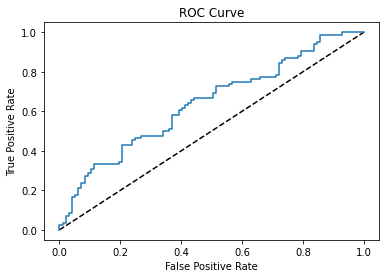

In [34]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [35]:
roc_auc_score(y_test,y_pred_prob)

0.6390525282277859

In [42]:
from sklearn import preprocessing

In [47]:
X_train = X
Y_train = y

In [72]:
lbl = preprocessing.LabelEncoder()
for col in X_train.columns:
  X_train[col] = lbl.fit_transform(X_train[col].astype(str))
  X_test[col] = lbl.fit_transform(X_test[col].astype(str))

In [73]:
import lightgbm as lgb
hyperparameters = {'boosting_type':'gbdt', 'num_leaves':2, 'max_depth':7, 'learning_rate':0.5, 'n_estimators':100, 'subsample_for_bin':50,'reg_lambda': 10}
booster = lgb.LGBMClassifier(**hyperparameters)
clf = booster.fit(X_train,Y_train,feature_name = list(X_train.columns) )
y_pred_train = clf.predict_proba(X_train).T[1]
y_pred_test = clf.predict_proba(X_test).T[1]




In [74]:
clf.score(X_train,Y_train)

0.6721763085399449

In [75]:
clf.score(X_test,y_test)

0.5027624309392266

In [78]:
!pip install catboost

^C


In [80]:
cutoff1 = round(X.shape[0]*0.6)
cutoff2 = round(X.shape[0]*0.8)
X_train,X_val,X_test = X[0:cutoff1], X[cutoff1:cutoff2],X[cutoff2:]
y_train,y_val,y_test = y[0:cutoff1],y[cutoff1:cutoff2], y[cutoff2:]

In [81]:
!pip install catboost

  Using cached catboost-1.0.6-cp39-none-win_amd64.whl (73.9 MB)
  Using cached graphviz-0.20-py3-none-any.whl (46 kB)


In [82]:
from catboost import CatBoostClassifier, CatBoostRegressor

model = CatBoostClassifier(num_trees=1000,
                           eval_metric='Logloss', 
                           thread_count=-1,
                           random_seed=42)
          
model.fit(X_train, y_train,
          verbose=True,
          early_stopping_rounds=50,
          eval_set=[(X_val, y_val)])

Learning rate set to 0.025814
0:	learn: 0.6854774	test: 0.6932706	best: 0.6932706 (0)	total: 163ms	remaining: 2m 42s
1:	learn: 0.6813191	test: 0.6919999	best: 0.6919999 (1)	total: 179ms	remaining: 1m 29s
2:	learn: 0.6767540	test: 0.6919557	best: 0.6919557 (2)	total: 216ms	remaining: 1m 11s
3:	learn: 0.6735013	test: 0.6917976	best: 0.6917976 (3)	total: 231ms	remaining: 57.5s
4:	learn: 0.6695922	test: 0.6927066	best: 0.6917976 (3)	total: 251ms	remaining: 50s
5:	learn: 0.6674119	test: 0.6917110	best: 0.6917110 (5)	total: 277ms	remaining: 45.8s
6:	learn: 0.6641039	test: 0.6902263	best: 0.6902263 (6)	total: 307ms	remaining: 43.5s
7:	learn: 0.6606875	test: 0.6908798	best: 0.6902263 (6)	total: 334ms	remaining: 41.4s
8:	learn: 0.6575907	test: 0.6917444	best: 0.6902263 (6)	total: 363ms	remaining: 40s
9:	learn: 0.6546131	test: 0.6932157	best: 0.6902263 (6)	total: 404ms	remaining: 40s
10:	learn: 0.6516589	test: 0.6942078	best: 0.6902263 (6)	total: 448ms	remaining: 40.3s
11:	learn: 0.6477231	test:

97:	learn: 0.4420267	test: 0.6953043	best: 0.6883995 (51)	total: 3.55s	remaining: 32.6s
98:	learn: 0.4396915	test: 0.6948514	best: 0.6883995 (51)	total: 3.62s	remaining: 32.9s
99:	learn: 0.4383995	test: 0.6944090	best: 0.6883995 (51)	total: 3.67s	remaining: 33s
100:	learn: 0.4356215	test: 0.6945649	best: 0.6883995 (51)	total: 3.71s	remaining: 33s
101:	learn: 0.4340171	test: 0.6946607	best: 0.6883995 (51)	total: 3.74s	remaining: 33s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6883995434
bestIteration = 51

Shrink model to first 52 iterations.


In [84]:
np.mean(model.predict(X_test)==y_test)

0.4827586206896552

ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\gmbas\\anaconda3\\Lib\\site-packages\\catboost\\_catboost.pyd'
Consider using the `--user` option or check the permissions.

ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\gmbas\\anaconda3\\Lib\\site-packages\\catboost\\_catboost.pyd'
Consider using the `--user` option or check the permissions.



  Using cached catboost-1.0.6-cp39-none-win_amd64.whl (73.9 MB)
  Using cached graphviz-0.20-py3-none-any.whl (46 kB)
  Using cached plotly-5.8.0-py2.py3-none-any.whl (15.2 MB)


In [83]:
model.score(X_test,y_test)

0.4827586206896552

In [86]:
df.columns

Index(['5th_CS_min_blue', '4th_CS_min_blue', '3rd_CS_min_blue',
       '2nd_CS_min_blue', '1st_CS_min_blue', '5th_CS_min_red',
       '4th_CS_min_red', '3rd_CS_min_red', '2nd_CS_min_red', '1st_CS_min_red',
       '5th_kda_blue', '4th_kda_blue', '3rd_kda_blue', '2nd_kda_blue',
       '1st_kda_blue', '5th_kda_red', '4th_kda_red', '3rd_kda_red',
       '2nd_kda_red', '1st_kda_red', '5th_MP_blue', '4th_MP_blue',
       '3rd_MP_blue', '2nd_MP_blue', '1st_MP_blue', '5th_MP_red', '4th_MP_red',
       '3rd_MP_red', '2nd_MP_red', '1st_MP_red', 'target'],
      dtype='object')

In [98]:
df2 = df.drop(['5th_CS_min_blue', '4th_CS_min_blue', '3rd_CS_min_blue',
       '2nd_CS_min_blue', '1st_CS_min_blue', '5th_CS_min_red',
       '4th_CS_min_red', '3rd_CS_min_red', '2nd_CS_min_red', '1st_CS_min_red',
       '5th_kda_blue', '4th_kda_blue', '3rd_kda_blue', '2nd_kda_blue',
       '1st_kda_blue', '5th_kda_red', '4th_kda_red', '3rd_kda_red',
       '2nd_kda_red', '1st_kda_red'],axis = 1)

In [99]:
df2

,5th_MP_blue,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
0,6045,27869,28759,90591,139033,5702,6894,17226,60900,104796,1
1,12382,39489,230329,1140402,1173761,25119,39085,81033,120399,2342839,0
2,11852,18062,30808,35375,53165,1209,10990,11605,17510,1377402,1
3,27186,159593,191837,193851,292959,19550,47094,58443,87329,464856,0
4,1233,10714,15688,34450,101033,11441,11980,22250,52517,71398,1
...,...,...,...,...,...,...,...,...,...,...,...
925,8771,10650,35904,56382,495855,2743,66034,202130,709380,721154,1
926,1414,18754,85240,100878,543559,2092,3374,6775,12643,946303,1
927,7072,10958,37538,139703,150471,8974,9033,27138,152271,178701,0
928,3029,3571,11851,48540,381589,38679,65706,352602,394108,825205,1


In [100]:
y2 = df2['target']
X2 = df2.drop('target',axis = 1)

In [101]:
X2

,5th_MP_blue,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red
0,6045,27869,28759,90591,139033,5702,6894,17226,60900,104796
1,12382,39489,230329,1140402,1173761,25119,39085,81033,120399,2342839
2,11852,18062,30808,35375,53165,1209,10990,11605,17510,1377402
3,27186,159593,191837,193851,292959,19550,47094,58443,87329,464856
4,1233,10714,15688,34450,101033,11441,11980,22250,52517,71398
...,...,...,...,...,...,...,...,...,...,...
925,8771,10650,35904,56382,495855,2743,66034,202130,709380,721154
926,1414,18754,85240,100878,543559,2092,3374,6775,12643,946303
927,7072,10958,37538,139703,150471,8974,9033,27138,152271,178701
928,3029,3571,11851,48540,381589,38679,65706,352602,394108,825205


In [102]:
cutoff2 = round(X.shape[0]*0.8)
X2,X_test2 = X2[0:cutoff2],X2[cutoff2:]
y2,y_test2 = y2[0:cutoff2],y2[cutoff2:]

In [103]:
RF2 = RandomForestClassifier()

In [104]:
RF2.fit(X2,y2)

RandomForestClassifier()

In [105]:
RF2.score(X_test2,y_test2)

0.5920245398773006

In [106]:
X2

,5th_MP_blue,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red
0,6045,27869,28759,90591,139033,5702,6894,17226,60900,104796
1,12382,39489,230329,1140402,1173761,25119,39085,81033,120399,2342839
2,11852,18062,30808,35375,53165,1209,10990,11605,17510,1377402
3,27186,159593,191837,193851,292959,19550,47094,58443,87329,464856
4,1233,10714,15688,34450,101033,11441,11980,22250,52517,71398
...,...,...,...,...,...,...,...,...,...,...
590,3032,13065,36902,92065,309430,10695,29324,81969,260516,407260
591,56691,62642,62857,103404,391883,1433,21081,163046,207345,1815298
592,4656,12721,73052,195969,258892,5441,23463,35785,69431,426528
593,51187,52813,233906,813471,1108303,14232,16142,16917,131163,549987
